# Projeto: Análise de sentimentos de comentários do twitter sobre repercusão do debate entre Donalt Trump e Kamala Karris.

## Objetivo

O objetivo desse trabalho é avaliar por análise de sentimentos a visão do público sobre o debate entre Donalt Trump contra Kamala Harris do dia 10 de Setembro, a partir dos comentários das principais publicações sobre o tema no twitter. A metodologia adotada foi de selecionar duas postagens favoráveis a Kamala e duas à Trump, pois pela característica de bolha nas redes sociais a tendência é que os posts alcancem em maior número pessoas que tenham o mesmo posicionamento politíco. Para ter uma visão mais neutra, também foi selecionada uma postagem do jornal CNN para ser avaliados os comentários.   

## Etapas:

1 - Acessar o Twitter utilizando a biblioteca selenium e realizar o login. <br/>
2 - Escolha das publicações que serão avaliadas: como metodologia de estudo, foram escolidos duas postagens favoraveis a Kamal e duas de apoiadores do Trump, pois pela característica de bolhas nas redes sociais as postagens tentem a mais aos usuários que são adeptos aquela linha de pensamento. Também foi escolhido uma publicação da CNN para uma visão mais neutra sobre o debate. <br/>
3 - Leitura dos comentários.
4 - Análise de sentimentos de cada publicação. <br/>
5 - conclusões finais.<br/>


In [ ]:
#pip install wordcloud
#pip install nltk
#pip install selenium

## 1 - Acessar o Twitter utilizando a biblioteca selenium e realizar o login.

In [2]:

from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep 

#Carrendo o navegador Chrome e entrando a pagine de login do Twitter
chrome = Service(ChromeDriverManager().install())
navegador = webdriver.Chrome(service=chrome)

navegador.get("https://twitter.com/login")

In [4]:
#Inserir o usuário e clicar o pontão avançar
#Algumas vezes o twitter pode te enviar para ua pagina de verificação de que você não é um bot, nesse caso deve responder manualmente.
sleep(3)
nome_usuario = navegador.find_element('xpath','//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[4]/label/div/div[2]/div/input')
#aqui deve adicionar o enderenço de email para logar no twitter
nome_usuario.send_keys("adicione endereco de email")
botao_avancar = navegador.find_element('xpath','//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/button[2]')
botao_avancar.click()


In [6]:
#Inserir a senha e terminar o login.
sleep(3)
senha = navegador.find_element('xpath','//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
senha.send_keys("senha do email") # adicione a senha do seu email para terminar o login. 
botao_entrar = navegador.find_element('xpath','//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[2]/div/div[1]/div/div/button')
botao_entrar.click()

## 2 - Escolha das publicações que serão avaliadas

In [8]:
#realiza a pesquisa sobre o debate.
sleep(3)
pesquisa = navegador.find_element('xpath','//*[@id="react-root"]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/div/div[2]/div/input')
pesquisa.send_keys("trump x kamala harris debate")
pesquisa.send_keys(Keys.ENTER)

## 3 - Leitura dos comentários.

In [10]:
#Função que faz a leitura dos comentários.
def ler_comentarios():
    fim_scroll = True
    valor_scroll = 0
    sleep(5) 
    amazenar_comentarios = []
    #para consegir ler todos os cometários, é necessário scrollar a tela conforme armazena os comentários.
    while fim_scroll == True:
        #conforme você vai scrollando a tela, o seu tamanho máximo vai aumentando, por isso é necessário atualizar o seu tamanho a cada loop.
        last_height = navegador.execute_script("return document.body.scrollHeight")
        if valor_scroll >= last_height:
            fim_scroll = False
        else:
            
            navegador.execute_script("scrollBy(500,1000)")
            # esse sleep é para dar tempo da atualização da pagina conforme ocorre o scroll da pagina. Caso a internet for mais rápita, pode reduzir o time
            sleep(2.5) 
            valor_scroll += 1000
            comentarios = navegador.find_elements(By.XPATH,'//div[@data-testid="tweetText"]')
            for i in range(0,len(comentarios)):
                amazenar_comentarios.append(comentarios[i].text)
    #retira comentários iguais.
    amazenar_comentarios = list(dict.fromkeys(amazenar_comentarios))
    return amazenar_comentarios
    


<img src = "img/Kamala1.png">

Essa é a primeira postagem de um apoiador de Kamala. Onde a postagem aborda a fala de Donalt Trump sobre imigrantes comento animais, que foi desmentinda ao vivo pelos moderadores do programa.  

In [14]:
#Entra na postagem escolida e faz a leitura dos comentários. 
navegador.get("https://x.com/Acyn/status/1833680606682820708") 
primeiro_post_fav_kamala = ler_comentarios()
len(primeiro_post_fav_kamala)

186

<img src = "img/Kamala2.png">

Segunda postagem favorável a Kamala, sobre o tema de aborto. postagem com menos cometários mais com um alcance de 1,2 milhoes de visualização.

In [18]:
navegador.get("https://x.com/isbyeathreat/status/1833677500582670550")
segundo_post_fav_kamala = ler_comentarios()
print(len(segundo_post_fav_kamala))

185


<img src = "img/Trump1.png">

Primeira postagem favorável ao Trump sobre a Kamala ter ajuda dos moderadores. 

In [20]:
navegador.get("https://x.com/WarClandestine/status/1833685715064074487")
primeiro_post_fav_trump = ler_comentarios()
print(len(primeiro_post_fav_trump))

186


<img src = "img/Trump2.png">

Segunda postagem favorável ao Trump sobre sua fala que Kamala é marxista. 

In [22]:
navegador.get("https://x.com/bennyjohnson/status/1833677545474052103")
segundo_post_fav_trump = ler_comentarios()
print(len(segundo_post_fav_trump))

206


## 4 - Análise de sentimentos de cada publicação.

In [24]:
#import streamlit as st
import nltk

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\Darven
[nltk_data]     Lima\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:
#Realiza a analise de sentimentos
sent_1kamala = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
for i in range(0, len(primeiro_post_fav_kamala)):
    sentimento = SentimentIntensityAnalyzer().polarity_scores(primeiro_post_fav_kamala[i])
    sent_1kamala[max(sentimento, key=sentimento.get)].append(primeiro_post_fav_kamala[i])


In [30]:
sent_1kamala['neg']

['No evidence…',
 'anerica was never great so wtf do y mean again?',
 'Fuck off',
 '',
 'Trump is mentally ill and a criminal, rapist and terrorist.',
 'tfg is absolutely insane!']

E possível observar que os sentimentos negativos são criticas ao Trump sobre a fala sobre imigrantes.

In [32]:
sent_1kamala['pos']

['Yep',
 'Good',
 'Thanks Kamala ',
 'This is wonderful',
 'It’s true!!!',
 'She laughed at him! ',
 'Baited perfectly.',
 'It’s a highlight! ',
 'She’s playing him like a fiddle',
 'Unbelievable.']

Já nos sentimentos positivos é unanime que os os apoiadores gostaram da Kamala nessa parte do debate.

In [34]:
sent_1kamala['compound']

['Trump ate her up tonight, every single poll has him winning by huge margins.',
 "My absolute favorite part of the debate. \nI'm giggling like a schoolgirl.",
 'He can’t help himself lmao keep throwing him the set up',
 "I admire Trump's focus on cutting unnecessary regulations to boost business.",
 'You mean he’s speaking the truth, fact check: True',
 'She hooked him in so good, he looks like salmon flailing in the wind',
 'This was the best part',
 'She literally LAUGHED at him',
 'The laughing in the background was awesome',
 'Yep. She baited the ever loving sh*t out of him!!!',
 'Yep. That was beautiful to watch.',
 'When kamala laughed, I laughed too',
 'Thank goodness I don’t have a pet',
 'I need a clip of just her fantastic, incredulous laugh about this pet eating BS']

Na analise de sentimento considerada composto, a maioria das respostas também são favoráreis a Kamala.

Como a maior parte dos comentários ficaram como sentimentos neutros, foi usada uma nuvem de palavras para entender de forma geral os principais argumentos sobre o tema. 

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use("TkAgg")

In [38]:
#agrupa as frases de cada comentário, formando um texto continuo. 
agrupar_texto = " ".join(s for s in sent_1kamala['neu'])

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Darven
[nltk_data]     Lima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Darven
[nltk_data]     Lima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
# Função para retirar os stopwords, pois certas palavras não eram retiradas no WordCloud.
def frenquencia_palavras(texto):
    stop_words = set(stopwords.words('english'))
    stop_words.update([".",",","!","’","?","'s",'i','she','he','the',"@",":","#","''",'this',"“","n't","”","...","abc","and","it","oh","right","you",
                   'call','if','that','they','so', '3','....', '..','what','we','when','``','ca','1','*','t','-','harris','donald','lol','debate'])
    word_tokens = word_tokenize(texto)
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(str.lower(w))
    #frequencia = nltk.FreqDist(filtered_sentence)
    filtered_sentence = " ".join(s for s in filtered_sentence)
    return filtered_sentence


In [44]:
texto = frenquencia_palavras(agrupar_texto)

In [46]:
def nuvem_de_palavras(texto):
    stopwords = set(STOPWORDS)
    stopwords = stopwords.update([".",",","!","’","?","'s",'i','she','he','the',"@",":","#","''",'this',"“","n't","”","...","abc","and","it","oh","right"
                              ,"you",'call','if','that','they','so', '3','....', '..','what','we','when','``','ca','1','s','t',"t",'-',
                              'harris','donald','lol',"S"])
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(texto)
    plt.subplots(figsize=(10,6))
    plt.rcParams["figure.autolayout"] = False
    plt.imshow(wordcloud)
    plt.show()
    

Como é possível observar, palavras como eating, cat e immigrants foram bastante comentadas, mostrando que a maioria dos comentarios seguem sobre a critica da fala do Trump, mas também pode-se notar palavras como putin, provavelmente apoiadores do Trump tentando criticar Kamala como se ela fosse aliada da Russia como será mostrado e outra postagem.

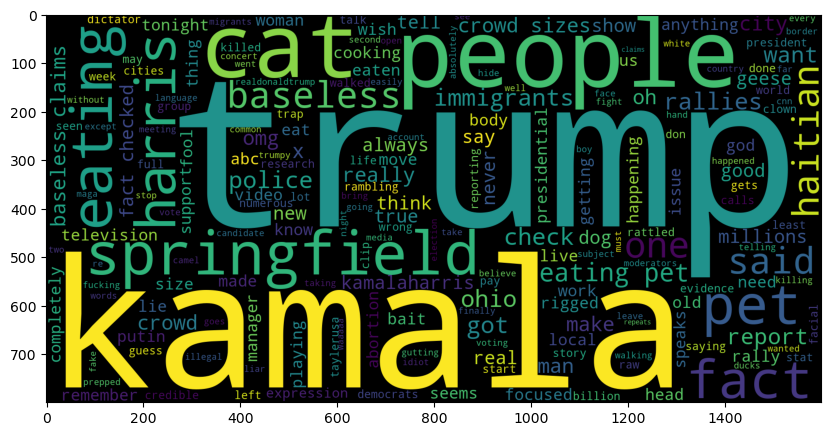

In [48]:
word = nuvem_de_palavras(texto)

In [50]:
sent_2kamala = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
for i in range(0, len(segundo_post_fav_kamala)):
    sentimento = SentimentIntensityAnalyzer().polarity_scores(segundo_post_fav_kamala[i])
    sent_2kamala[max(sentimento, key=sentimento.get)].append(segundo_post_fav_kamala[i])

In [52]:
sent_2kamala['neg']

['',
 'Your dumb',
 'She lied.\nhttps://worldpopulationreview.com/state-rankings/late-term-abortion-laws-by-state…',
 'No',
 'She’s resorted to lying',
 'No the bitch got roasted. Potatoes bitch.',
 'She’s getting fired up over his lies. Good!',
 'Murdering babies is nothing too be proud of.',
 'Trump wasn’t lying',
 'Bull shit she was lying!',
 'She didn’t do shit',
 'Baby murder bringing ANYONE JOY IS DISGUSTING.',
 'Because she spewed lies!!!',
 "No she didn't lol",
 'Nah… she is a nervous wreck ',
 'You’re lost',
 'Are you actually stupid?',
 'Abortions gross',
 'She is a liar',
 'No.',
 'Nah',
 'Shes lying u blind idiot! Wake tf up',
 'Murdering babies is ok with you?',
 'No she didn’t she corroborated him on rape and didn’t even know. You are retarded as fuck',
 'BS , abortion is murder.',
 'Keep killing those babies Kamala!',
 'Blocked for lying',
 ' no',
 'She is a communist\nLiar']

Nesse segundo post, por ser um assunto mais controverso como o aborto, os sentimentos negativos já são atacando a Kamala dizendo que ela mentiu no argumento e que aborto é errado.

In [54]:
sent_2kamala['pos']

['lol lol lol lol',
 'Lmao  okay',
 'Lmao wrong',
 'Yeah right ',
 'Sweetie stop drinking.',
 'PERFECTION!!!',
 'Killing babies,  yes Democrats love it.']

Nas postagens positivas possuem bem menos comentários e era eles existe analises erradas de sentimentos, como a mensagem 'Sweetie stop drinking.' e 'Killing babies,  yes Democrats love it.'. 

In [56]:
sent_2kamala['compound']

['LOL, hardly. You lie as well as her.',
 'Lmao thats an absolute joke ',
 'Love how all the cum dumpsters on here are loving the late term abortion. We can see who all the real diseased rotten crotches are on here. Great job hoes !',
 'Sure sure she did. She’s blowing something',
 'I’m sure any account that would post a video like this is entirely capable of objective debate analysis.',
 'All Kamala did was play on emotions LOL',
 "Trump:  Oh so it's ok to do an abortion at 8-9 months was a super uno reverse card ",
 'Time for your vaccination to keep your job.  Feeling the freedom now?']

Na analise de sentimentos compostos também ocorreu criticas relativas ao tema, os apoiadores do Trump argumentando que a Kamala mentiu.

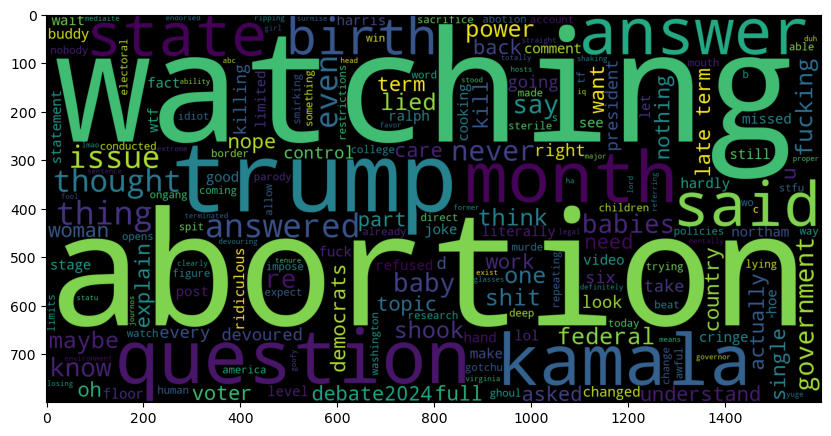

In [58]:
agrupar_texto = " ".join(s for s in sent_2kamala['neu'])
texto = frenquencia_palavras(agrupar_texto)
nuvem_de_palavras(texto)

Pela nuvem de palavras é possível notar o mesmo padrão de argumentação dos apoiadores do Trump, onde palvras com killing e babies foram bastante usadas.

In [60]:
sent_1trump = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
for i in range(0, len(primeiro_post_fav_trump)):
    sentimento = SentimentIntensityAnalyzer().polarity_scores(primeiro_post_fav_trump[i])
    sent_1trump[max(sentimento, key=sentimento.get)].append(primeiro_post_fav_trump[i])

In [62]:
sent_1trump['neg']

['',
 '.',
 '   ',
 'Horrible woman.',
 'Tag shes shit!',
 'I laughed my ass off. ',
 'He looked like a moron when he said this. Weak!',
 'Not a chance. He was so lame.',
 'God, she is so ugly',
 "you're retarded brother",
 'Trump is getting destroyed',
 'What an ass.',
 'he’s stuttering',
 'MAGATs are so dumb',
 'Trump blew it bad. No plans whatsoever.',
 "He's IGNORANT. Petty grievances is ALL HE KNOWS."]

Na primeira postagem favorável ao Trump, a maioria dos comentários negativos sao contra o próprio Trump, onde os apoiadores de Kamala rebatem a post argumentado que ele está destruido, que ele é ignorante e que ele estava gaguejando.

In [64]:
sent_1trump['pos']

['I loved that moment.',
 'That was hilarious!',
 'Lol',
 'Love it!',
 'Loved this!',
 'Best play ever. ',
 'My favorite mic drop moment!',
 'So great.',
 'I’m still laughing ',
 'I loved it also.',
 'So true!!!',
 'Oh sweetie',
 'Loved it !']

Na anaise de sentimentos positivos os apoiadores do Trump gostaram do momento.

In [66]:
sent_1trump['compound']

['That was when he won.',
 "Oh he's quick. That was brilliant. Excellent timing.",
 'That was a highlight for sure. Trump was being Trump. She is a dangerous woman and as shallow as they come. But, a successful political opportunist.',
 "Notice how Trump's mike was muted while she talked but hers was NOT while he talked.   I loved this moment!  Trump so won and set Kamala in her place like a parent talks to a child.",
 'This was a great moment ',
 "This election is CLEAR:\nFreedom for the People vs Government machine!!\nBetter pick right because I'm betting it's our last chance!!",
 'I missed that!  Zing!! The look on her face is priceless. Yeah he just said that to you perfectly',
 'This is spot on. Great job! ',
 'Best moment of the night',
 'I ABSOLUTELY LOVED THAT MOMENT! ']

Nos sentimentos compostos a maioria é favorável a Trump, onde seus apoiadores constaram da interrupção que Trump fez a Kamala.

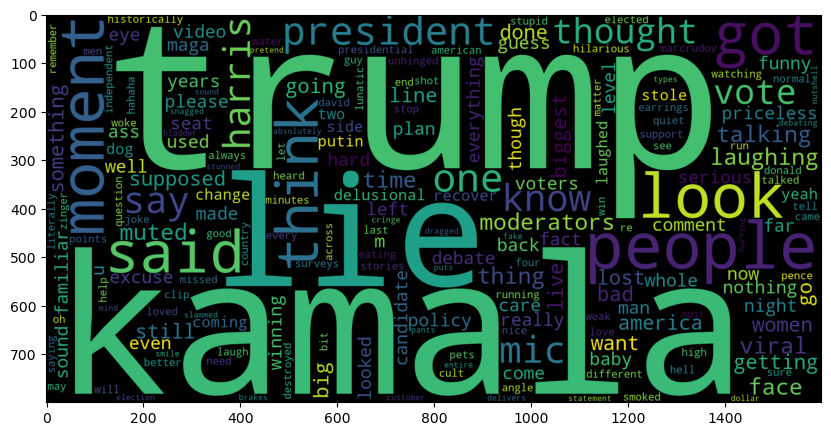

In [68]:
agrupar_texto = " ".join(s for s in sent_1trump['neu'])
texto = frenquencia_palavras(agrupar_texto)
nuvem_de_palavras(texto)

Pela nuvem de palavras da para avaliar que os apoadores do Trump argumentam sobre os moderadores que estariam ajudando Kamala, sobre o mic do Trump que era cortado no momento das falas da Kamala mas não o da Kamala nas falas do Trump. Já os apoiadores da Kamala usam os argumentos que Trump está delirante é cringe e sobre a fala que os imigrantes comem animais. 

In [70]:
sent_2trump = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
for i in range(0, len(segundo_post_fav_trump)):
    sentimento = SentimentIntensityAnalyzer().polarity_scores(segundo_post_fav_trump[i])
    sent_2trump[max(sentimento, key=sentimento.get)].append(segundo_post_fav_trump[i])

In [72]:
sent_2trump['neg']

['benny, have you no self respect? no shame?',
 ',',
 'Hahaha, she’s destroying the old fool.',
 'The convicted felon trump was confused, angry and a liar.',
 "You're dumb as hell if you think Trump did well. He got destroyed. Harris/Walz 2024.",
 'the marxist scare no longer holds value, Trump embarrassed himself',
 'Weak! Just like Trump! ',
 'You’re so dumb. ',
 'Trump lost bigly.',
 '',
 'She was behaving so bad. That was a terrible look',
 'No',
 'Smoked? More like liar liar pants on fire!',
 'Trump is a liar']

Na segunda postagem favorável ao Trump, os sentimentos negativos são criticas ao Donalt Trump sobre o argumento que Kamala é marxista.

In [74]:
sent_2trump['pos']

['Clearly, Trump won!',
 'lol yeah ok ',
 'Loved it',
 "You're so funny",
 'P  \nI’m sure l  lol',
 'I agree with Trump.',
 'WOW! Powerful \n@bennyjohnson',
 'Kamala won.',
 'Lmao  buddy nobody gives a shit']

A analise de sentimentos positiva é mista, alguns comentários a favor do Trump outros favorável a Kamala.

In [76]:
sent_2trump['compound']

["Ha ha you know you're a joke now right?",
 'STRONG cope from the Russian influencers tonight',
 'Justice Department Disrupts Covert Russian Government-Sponsored Foreign Malign Influence Operation Targeting Audiences in the United States and Elsewhere\n\n: https://justice.gov/opa/pr/justice-department-disrupts-covert-russian-government-sponsored-foreign-malign-influence…',
 'Nice try.  Nice spin. She creamed him.',
 'Your mind is clearly not registering what the world witnessed Benny.\nTime for a doctor visit. Hopefully, your condition can be solved.',
 'SAY PUTIN BEST BLOW JOB...',
 'WOW!\n\nYou spin faster than a neutron star.',
 'Yes Benny talk!!! talk!!!']

Na analise de sentimentos composta também tem opiniões mistas, alguns comentarios ironizando o dono da postagem outros falando da possivel influencia dos russos nas eleições.  

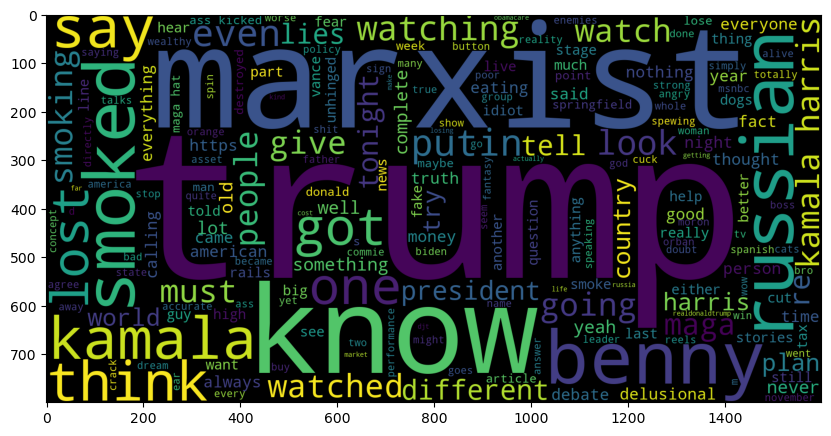

In [78]:
agrupar_texto = " ".join(s for s in sent_2trump['neu'])
texto = frenquencia_palavras(agrupar_texto)
nuvem_de_palavras(texto)

Na nuvem de palavras é observavel o mesmo padrão de palavras do post inicial, sobre marxismo, putin e Russia.

<img src = "img/CNN.png">

In [80]:
navegador.get("https://x.com/CNN/status/1833703753179857334")
post_neu_cnn = ler_comentarios()

print(len(post_neu_cnn))

200


In [82]:
neutro_cnn = {'neg': [], 'neu': [], 'pos': [], 'compound': []}
for i in range(0, len(post_neu_cnn)):
    sentimento = SentimentIntensityAnalyzer().polarity_scores(post_neu_cnn[i])
    neutro_cnn[max(sentimento, key=sentimento.get)].append(post_neu_cnn[i])

In [84]:
neutro_cnn['neg']

["Kamala's Debate Lies!!",
 'Fuck you communists.',
 '',
 'Kamala is a serial liar, just like fake news CNN',
 'Democrats campaign propaganda',
 'Well in his defense, he is a raging idiot',
 'And you are delusional she sucked ass',
 'She was horrible  nice try.',
 'ABC sucked and never fact checked the bitch']

Nessa postagem da CNN, os comentários de sentimentos negativos são contra a Kamala e a propria CNN.

In [86]:
neutro_cnn['pos']

['Lol',
 'Who won?',
 "It's good debate",
 'She had two helpers as well.',
 ' nice try cnn…',
 'Trump won']

Na analise de sentimentos positivos, posue um comentário dizzendo que Trump ganhou o debate e que Kamala teve ajuda dos moderadores. 

In [88]:
neutro_cnn['compound']

['Trump clearly won the debate.',
 'Nah he did amazing 3 vs 1 all night!! \n@ABC\n should be ashamed as journalist and they should be banned from holding future debates. She didn’t make any of her policies clear to anyone! Trump won tonight and we got great suites moving forward to expose all the lies she spewed',
 'Kamala Harris won hearts today and there was a great debate.\n#Trump',
 'Universal truth is that girls are always strong in debate',
 'Easy win for Trump',
 'Lmao most delusional take',
 "Please stop with the Blackman not for VP Harris  !!! Not only are we fir her but we actually will protect her !!! Us real men have families and occupations to take care of . We're not answering emails or taking surveys on the race ! But please believe she's our next President  !",
 'And a clear script and two backups. Joke',
 "Tonight's debate, Harris' performance was good, (perhaps her best performance since becoming VP) Trump's performance was also good, less aggressive than usual, as he

Nos sentimentos compostos, a opnião é mista, onde alguns falam que Trump ganhou e outros que a Kamala foi melhor no debate

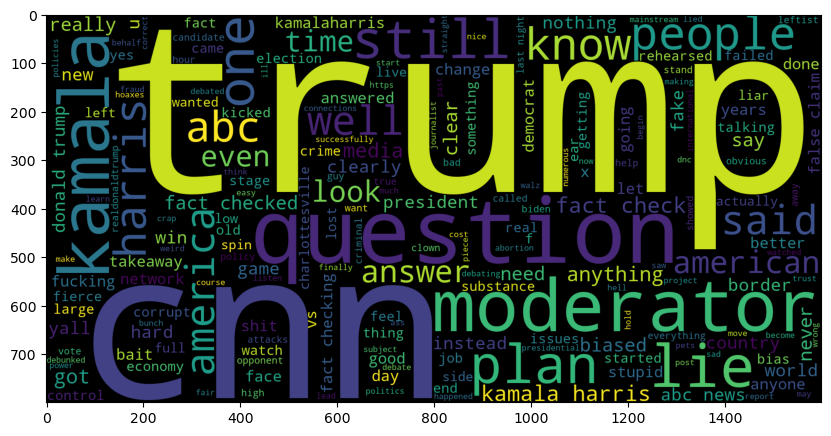

In [90]:
agrupar_texto = " ".join(s for s in neutro_cnn['neu'])
texto = frenquencia_palavras(agrupar_texto)
nuvem_de_palavras(texto)

Pela nuvem de palavras, é possivel notar que a temas como "moderator" e ABC, onde ocorreu o debate, mostra que muitos comentários abordam o assunto da fake news que Trump cometeu no debate e foi corrigida ao vivo pelos moderadores, em que os moderadores estariam ajudando a Kamala.  

## Conclusões finais. 

Como conclusão, é possível tirar insights sobre a percepição do público e possíveis estratégias para cada candidato.
Para a Kamala, a fake news que Trump cometeu durante o debate sobre os imigrantes foi algo bem favorárel a ela, já o assunto sobre aborto, por ser um assunto polemico, teve comentários com visões bem distintas, pode fortalecer sua base de apoiadores mas talvez dificulte conseguir novos apoiadores.

Analisando as postagens para o Trump, seu público argumenta que a Kamala obteve ajuda no debate e que a imprensa é parcial, o que pode ser uma boa abordagem para manter sua base de apoiadores coesa. Já no argumento que Kamala seria marxista não houve tanta efetividade, pois o público que já apoia
a Kamala não vê esse argumento como relevante. 